In [20]:
# Dependencies and Setup
import pandas as pd
import requests
from pathlib import Path
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt

#open csv files
emission_file = Path('resources/emissions-by-sector.csv')
emission_df = pd.read_csv(emission_file, encoding="ISO-8859-1")

methane_file = Path('resources/methane-emissions-by-sector.csv')
methane_df = pd.read_csv(methane_file, encoding="ISO-8859-1")

# co2_file = Path('resources/CO2_emission.csv')
# co2_df = pd.read_csv(co2_file, encoding="ISO-8859-1")

In [21]:
emission_df

,Entity,Code,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,AFG,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,980000.0,320000.0,280000.0,0.0,20000.00
1,Afghanistan,AFG,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00
2,Afghanistan,AFG,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00
3,Afghanistan,AFG,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00
4,Afghanistan,AFG,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,ZWE,2016,10490000.0,87400000.0,2480000.0,2650000.00,1600000.0,1080000.0,2220000.0,5930000.0,680000.0,800000.0,129999.99
6351,Zimbabwe,ZWE,2017,10760000.0,87290000.0,2540000.0,2690000.00,1680000.0,1100000.0,2280000.0,5160000.0,700000.0,800000.0,160000.00
6352,Zimbabwe,ZWE,2018,10940000.0,87380000.0,2590000.0,2740000.00,1830000.0,1160000.0,2930000.0,5530000.0,710000.0,940000.0,190000.00
6353,Zimbabwe,ZWE,2019,10990000.0,87330000.0,2640000.0,2770000.00,1810000.0,1100000.0,2600000.0,5130000.0,730000.0,930000.0,160000.00


In [22]:
# Remove column 'Code' from the DataFrame
cleaned_emission = emission_df.drop('Code', axis=1)
cleaned_emission

,Entity,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,980000.0,320000.0,280000.0,0.0,20000.00
1,Afghanistan,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00
2,Afghanistan,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00
3,Afghanistan,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00
4,Afghanistan,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,2016,10490000.0,87400000.0,2480000.0,2650000.00,1600000.0,1080000.0,2220000.0,5930000.0,680000.0,800000.0,129999.99
6351,Zimbabwe,2017,10760000.0,87290000.0,2540000.0,2690000.00,1680000.0,1100000.0,2280000.0,5160000.0,700000.0,800000.0,160000.00
6352,Zimbabwe,2018,10940000.0,87380000.0,2590000.0,2740000.00,1830000.0,1160000.0,2930000.0,5530000.0,710000.0,940000.0,190000.00
6353,Zimbabwe,2019,10990000.0,87330000.0,2640000.0,2770000.00,1810000.0,1100000.0,2600000.0,5130000.0,730000.0,930000.0,160000.00


In [23]:
methane_df

,Entity,Code,Year,Methane emissions from agriculture,Fugitive emissions of methane from energy production,Methane emissions from waste,Methane emissions from land use change and forestry,Methane emissions from other fuel combustion,Methane emissions from industry
0,Afghanistan,AFG,1990,5360000.0,280000.0,1090000.0,0.0,0.0,0.0
1,Afghanistan,AFG,1991,5600000.0,240000.0,1170000.0,0.0,0.0,0.0
2,Afghanistan,AFG,1992,5670000.0,200000.0,1250000.0,0.0,0.0,0.0
3,Afghanistan,AFG,1993,5710000.0,160000.0,1330000.0,0.0,0.0,0.0
4,Afghanistan,AFG,1994,5930000.0,120000.0,1410000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,ZWE,2016,6140000.0,680000.0,2320000.0,110000.0,120000.0,480000.0
6351,Zimbabwe,ZWE,2017,6230000.0,700000.0,2370000.0,60000.0,120000.0,480000.0
6352,Zimbabwe,ZWE,2018,6380000.0,710000.0,2420000.0,110000.0,120000.0,480000.0
6353,Zimbabwe,ZWE,2019,6440000.0,730000.0,2470000.0,80000.0,120000.0,480000.0


In [24]:
# Remove column 'Code' from the DataFrame
cleaned_methane = methane_df.drop('Code', axis=1)
cleaned_methane

,Entity,Year,Methane emissions from agriculture,Fugitive emissions of methane from energy production,Methane emissions from waste,Methane emissions from land use change and forestry,Methane emissions from other fuel combustion,Methane emissions from industry
0,Afghanistan,1990,5360000.0,280000.0,1090000.0,0.0,0.0,0.0
1,Afghanistan,1991,5600000.0,240000.0,1170000.0,0.0,0.0,0.0
2,Afghanistan,1992,5670000.0,200000.0,1250000.0,0.0,0.0,0.0
3,Afghanistan,1993,5710000.0,160000.0,1330000.0,0.0,0.0,0.0
4,Afghanistan,1994,5930000.0,120000.0,1410000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6350,Zimbabwe,2016,6140000.0,680000.0,2320000.0,110000.0,120000.0,480000.0
6351,Zimbabwe,2017,6230000.0,700000.0,2370000.0,60000.0,120000.0,480000.0
6352,Zimbabwe,2018,6380000.0,710000.0,2420000.0,110000.0,120000.0,480000.0
6353,Zimbabwe,2019,6440000.0,730000.0,2470000.0,80000.0,120000.0,480000.0


In [25]:
merge_df = pd.merge(cleaned_emission, cleaned_methane, on=['Entity', 'Year'], how='inner')
merge_df

,Entity,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Methane emissions from agriculture,Fugitive emissions of methane from energy production,Methane emissions from waste,Methane emissions from land use change and forestry,Methane emissions from other fuel combustion,Methane emissions from industry
0,Afghanistan,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,980000.0,320000.0,280000.0,0.0,20000.00,5360000.0,280000.0,1090000.0,0.0,0.0,0.0
1,Afghanistan,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00,5600000.0,240000.0,1170000.0,0.0,0.0,0.0
2,Afghanistan,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00,5670000.0,200000.0,1250000.0,0.0,0.0,0.0
3,Afghanistan,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00,5710000.0,160000.0,1330000.0,0.0,0.0,0.0
4,Afghanistan,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00,5930000.0,120000.0,1410000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,2016,10490000.0,87400000.0,2480000.0,2650000.00,1600000.0,1080000.0,2220000.0,5930000.0,680000.0,800000.0,129999.99,6140000.0,680000.0,2320000.0,110000.0,120000.0,480000.0
6351,Zimbabwe,2017,10760000.0,87290000.0,2540000.0,2690000.00,1680000.0,1100000.0,2280000.0,5160000.0,700000.0,800000.0,160000.00,6230000.0,700000.0,2370000.0,60000.0,120000.0,480000.0
6352,Zimbabwe,2018,10940000.0,87380000.0,2590000.0,2740000.00,1830000.0,1160000.0,2930000.0,5530000.0,710000.0,940000.0,190000.00,6380000.0,710000.0,2420000.0,110000.0,120000.0,480000.0
6353,Zimbabwe,2019,10990000.0,87330000.0,2640000.0,2770000.00,1810000.0,1100000.0,2600000.0,5130000.0,730000.0,930000.0,160000.00,6440000.0,730000.0,2470000.0,80000.0,120000.0,480000.0


In [67]:
#Rename columns
renamed_df = merge_df.rename(columns={"Entity":"Country"})
renamed_df

,Country,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Methane emissions from agriculture,Fugitive emissions of methane from energy production,Methane emissions from waste,Methane emissions from land use change and forestry,Methane emissions from other fuel combustion,Methane emissions from industry
0,Afghanistan,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,980000.0,320000.0,280000.0,0.0,20000.00,5360000.0,280000.0,1090000.0,0.0,0.0,0.0
1,Afghanistan,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00,5600000.0,240000.0,1170000.0,0.0,0.0,0.0
2,Afghanistan,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00,5670000.0,200000.0,1250000.0,0.0,0.0,0.0
3,Afghanistan,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00,5710000.0,160000.0,1330000.0,0.0,0.0,0.0
4,Afghanistan,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00,5930000.0,120000.0,1410000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,2016,10490000.0,87400000.0,2480000.0,2650000.00,1600000.0,1080000.0,2220000.0,5930000.0,680000.0,800000.0,129999.99,6140000.0,680000.0,2320000.0,110000.0,120000.0,480000.0
6351,Zimbabwe,2017,10760000.0,87290000.0,2540000.0,2690000.00,1680000.0,1100000.0,2280000.0,5160000.0,700000.0,800000.0,160000.00,6230000.0,700000.0,2370000.0,60000.0,120000.0,480000.0
6352,Zimbabwe,2018,10940000.0,87380000.0,2590000.0,2740000.00,1830000.0,1160000.0,2930000.0,5530000.0,710000.0,940000.0,190000.00,6380000.0,710000.0,2420000.0,110000.0,120000.0,480000.0
6353,Zimbabwe,2019,10990000.0,87330000.0,2640000.0,2770000.00,1810000.0,1100000.0,2600000.0,5130000.0,730000.0,930000.0,160000.00,6440000.0,730000.0,2470000.0,80000.0,120000.0,480000.0


In [68]:
# duplicate dataframe before removing rows
duplicate_df = renamed_df.copy()

In [69]:
# Define the list of words to search for
words_to_search = ['Africa', 'Asia', 'European Union (27)', 'Europe', 'High-income countries',
                   'Low-income countries', 'Lower-middle-income countries', 'North America',
                   'Oceania', 'South America', 'Upper-middle-income countries', 'World']

# Initialize an empty list to store the rows to drop
rows_to_drop = []

# Iterate over the DataFrame rows
for index, row in renamed_df.iterrows():
    for word in words_to_search:
        if word in row['Country']:
            rows_to_drop.append(index)
            break  # Break out of the inner loop once a word is found

# Drop the rows
renamed_df.drop(rows_to_drop, inplace=True)

In [70]:
renamed_df

,Country,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Methane emissions from agriculture,Fugitive emissions of methane from energy production,Methane emissions from waste,Methane emissions from land use change and forestry,Methane emissions from other fuel combustion,Methane emissions from industry
0,Afghanistan,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,980000.0,320000.0,280000.0,0.0,20000.00,5360000.0,280000.0,1090000.0,0.0,0.0,0.0
1,Afghanistan,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00,5600000.0,240000.0,1170000.0,0.0,0.0,0.0
2,Afghanistan,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00,5670000.0,200000.0,1250000.0,0.0,0.0,0.0
3,Afghanistan,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00,5710000.0,160000.0,1330000.0,0.0,0.0,0.0
4,Afghanistan,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00,5930000.0,120000.0,1410000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,2016,10490000.0,87400000.0,2480000.0,2650000.00,1600000.0,1080000.0,2220000.0,5930000.0,680000.0,800000.0,129999.99,6140000.0,680000.0,2320000.0,110000.0,120000.0,480000.0
6351,Zimbabwe,2017,10760000.0,87290000.0,2540000.0,2690000.00,1680000.0,1100000.0,2280000.0,5160000.0,700000.0,800000.0,160000.00,6230000.0,700000.0,2370000.0,60000.0,120000.0,480000.0
6352,Zimbabwe,2018,10940000.0,87380000.0,2590000.0,2740000.00,1830000.0,1160000.0,2930000.0,5530000.0,710000.0,940000.0,190000.00,6380000.0,710000.0,2420000.0,110000.0,120000.0,480000.0
6353,Zimbabwe,2019,10990000.0,87330000.0,2640000.0,2770000.00,1810000.0,1100000.0,2600000.0,5130000.0,730000.0,930000.0,160000.00,6440000.0,730000.0,2470000.0,80000.0,120000.0,480000.0


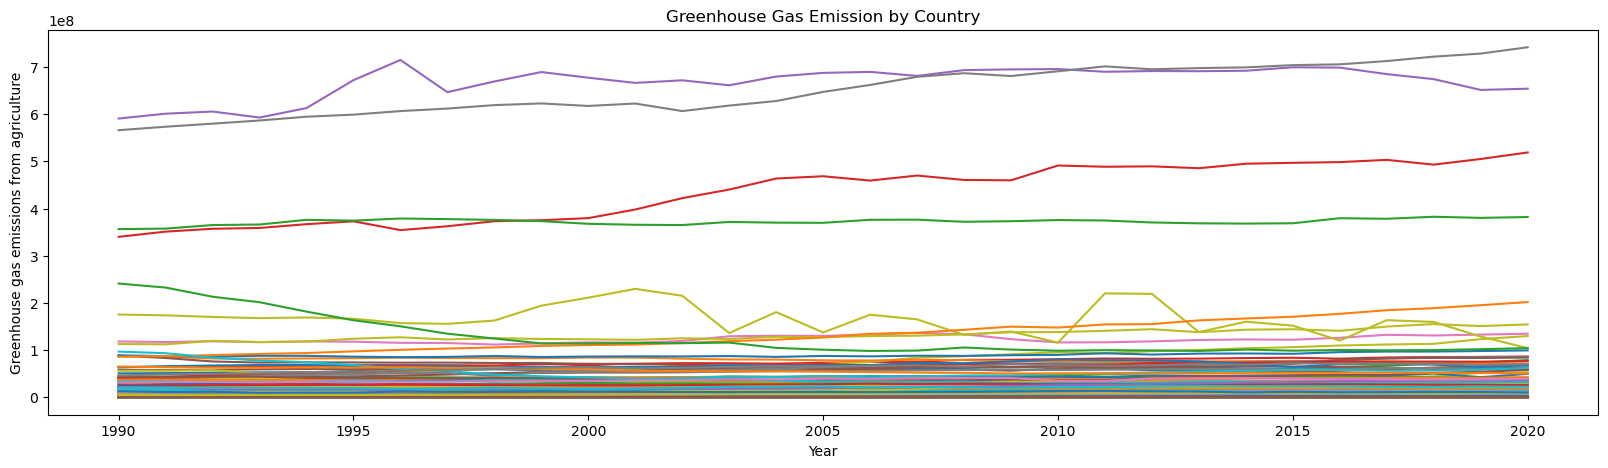

In [94]:
# Plot greenhouse gas emissions from agriculture for different years and countries
plt.figure(figsize=(20, 5))
for country in renamed_df['Country'].unique():
    country_data = renamed_df[renamed_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Greenhouse gas emissions from agriculture'], label=country)

plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions from agriculture')
plt.title('Greenhouse Gas Emission by Country')
plt.legend(args=)
plt.show()

In [72]:
duplicate_df

,Country,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Methane emissions from agriculture,Fugitive emissions of methane from energy production,Methane emissions from waste,Methane emissions from land use change and forestry,Methane emissions from other fuel combustion,Methane emissions from industry
0,Afghanistan,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,980000.0,320000.0,280000.0,0.0,20000.00,5360000.0,280000.0,1090000.0,0.0,0.0,0.0
1,Afghanistan,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00,5600000.0,240000.0,1170000.0,0.0,0.0,0.0
2,Afghanistan,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00,5670000.0,200000.0,1250000.0,0.0,0.0,0.0
3,Afghanistan,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00,5710000.0,160000.0,1330000.0,0.0,0.0,0.0
4,Afghanistan,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00,5930000.0,120000.0,1410000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,2016,10490000.0,87400000.0,2480000.0,2650000.00,1600000.0,1080000.0,2220000.0,5930000.0,680000.0,800000.0,129999.99,6140000.0,680000.0,2320000.0,110000.0,120000.0,480000.0
6351,Zimbabwe,2017,10760000.0,87290000.0,2540000.0,2690000.00,1680000.0,1100000.0,2280000.0,5160000.0,700000.0,800000.0,160000.00,6230000.0,700000.0,2370000.0,60000.0,120000.0,480000.0
6352,Zimbabwe,2018,10940000.0,87380000.0,2590000.0,2740000.00,1830000.0,1160000.0,2930000.0,5530000.0,710000.0,940000.0,190000.00,6380000.0,710000.0,2420000.0,110000.0,120000.0,480000.0
6353,Zimbabwe,2019,10990000.0,87330000.0,2640000.0,2770000.00,1810000.0,1100000.0,2600000.0,5130000.0,730000.0,930000.0,160000.00,6440000.0,730000.0,2470000.0,80000.0,120000.0,480000.0


In [ ]:
# ("China", "United States", "India", "Russia",
#  "Japan", "Germany", "Canada", "Iran",
#  "South Korea", "Indonesia", "Saudi Arabia",
#  "Brazil", "Mexico", "Australia", "South Africa",
#  "Turkey", "United Kingdom", "Italy", "France",
#  "Poland", "Greenland")

In [95]:
# Define the list of words to search for
words_to_search = ["China", "United States", "India", "Russia", 
                   "Japan", "Germany", "Canada", "Iran",
                   "South Korea", "Indonesia", "Saudi Arabia",
                   "Brazil", "Mexico", "Australia", "South Africa",
                   "Turkey", "United Kingdom", "Italy", "France",
                   "Poland", "Greenland"]

# Initialize an empty list to store the rows to keep
rows_to_keep = []

# Iterate over the DataFrame rows
for index, row in duplicate_df.iterrows():
    for word in words_to_search:
        if word == row['Country']:
            rows_to_keep.append(index)
            break  # Break out of the inner loop once a word is found

# Keep only the rows that contain the words in the list
filtered_df = duplicate_df.loc[rows_to_keep]

In [96]:
# # Define the list of words to search for
# words_to_search = ['Africa', 'Asia', 'Europe', 'North America',
#                    'Oceania', 'South America']

# # Initialize an empty list to store the rows to keep
# rows_to_keep = []

# # Iterate over the DataFrame rows
# for index, row in duplicate_df.iterrows():
#     for word in words_to_search:
#         if word == row['Country']:
#             rows_to_keep.append(index)
#             break  # Break out of the inner loop once a word is found

# # Keep only the rows that contain the words in the list
# filtered_df = duplicate_df.loc[rows_to_keep]

In [97]:
filtered_df

,Country,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Methane emissions from agriculture,Fugitive emissions of methane from energy production,Methane emissions from waste,Methane emissions from land use change and forestry,Methane emissions from other fuel combustion,Methane emissions from industry
310,Australia,1990,175290000.0,54850000.0,19930000.0,9300000.0,10810000.0,43100000.0,6.392000e+07,1.432900e+08,21480000.0,3410000.0,6550000.0,102040000.0,20970000.0,19640000.0,2290000.0,10000.0,80000.0
311,Australia,1991,173570000.0,54850000.0,19910000.0,9380000.0,10370000.0,43350000.0,6.242000e+07,1.459200e+08,22890000.0,3430000.0,6530000.0,101120000.0,22340000.0,19610000.0,2290000.0,10000.0,80000.0
312,Australia,1992,170130000.0,54850000.0,19650000.0,9730000.0,10300000.0,43040000.0,6.394000e+07,1.483600e+08,23520000.0,3480000.0,6900000.0,98840000.0,23070000.0,19350000.0,2290000.0,10000.0,80000.0
313,Australia,1993,167650000.0,54850000.0,19490000.0,10210000.0,9910000.0,43970000.0,6.507000e+07,1.497900e+08,24640000.0,3600000.0,7480000.0,96990000.0,23540000.0,19190000.0,2290000.0,10000.0,80000.0
314,Australia,1994,169140000.0,54850000.0,18790000.0,9900000.0,8450000.0,45680000.0,6.675000e+07,1.525400e+08,25220000.0,3690000.0,7880000.0,98680000.0,23470000.0,18490000.0,2290000.0,10000.0,90000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,United States,2016,379460000.0,-220240000.0,131030000.0,501940000.0,222020000.0,442309980.0,1.768760e+09,2.154190e+09,356680000.0,46850000.0,138120000.0,198060000.0,340100000.0,124380000.0,690000.0,450000.0,280000.0
6041,United States,2017,378280000.0,-219050000.0,132130010.0,503029980.0,227960000.0,432700000.0,1.781510e+09,2.072960e+09,373240000.0,46030000.0,149620000.0,198770000.0,355490000.0,125450000.0,1280000.0,420000.0,280000.0
6042,United States,2018,382549980.0,-219130000.0,133240010.0,556970000.0,231670000.0,457690020.0,1.820880e+09,2.105010e+09,419720000.0,46910000.0,140920000.0,202310000.0,393380000.0,126520000.0,1180000.0,510000.0,280000.0
6043,United States,2019,380180000.0,-220260000.0,134350000.0,557570000.0,238670000.0,442600000.0,1.815660e+09,1.965560e+09,465250000.0,39900000.0,150170000.0,201930000.0,432890020.0,127590000.0,570000.0,550000.0,280000.0


In [104]:
# sectors = ["Greenhouse gas emissions from agriculture",	"Greenhouse gas emissions from land use change and forestry",
#            "Greenhouse gas emissions from waste", "Greenhouse gas emissions from buildings",
#            "Greenhouse gas emissions from industry", "Greenhouse gas emissions from manufacturing and construction",
#            "Greenhouse gas emissions from transport", "Greenhouse gas emissions from electricity and heat",
#            "Fugitive emissions of greenhouse gases from energy production",	"Greenhouse gas emissions from other fuel combustion",
#            "Greenhouse gas emissions from bunker fuels"]
# countries = "Country"
# years = range(1990-2020)

# for country in countries:
#     for sector in sectors:
#         plt.plot(years, filtered_df[countries][sectors], label=f'{countries} - {sectors}')

# plt.title('Greenhouse Gas Emissions by Sector, Country, and Year')
# plt.xlabel('Year')
# plt.ylabel('Emissions')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

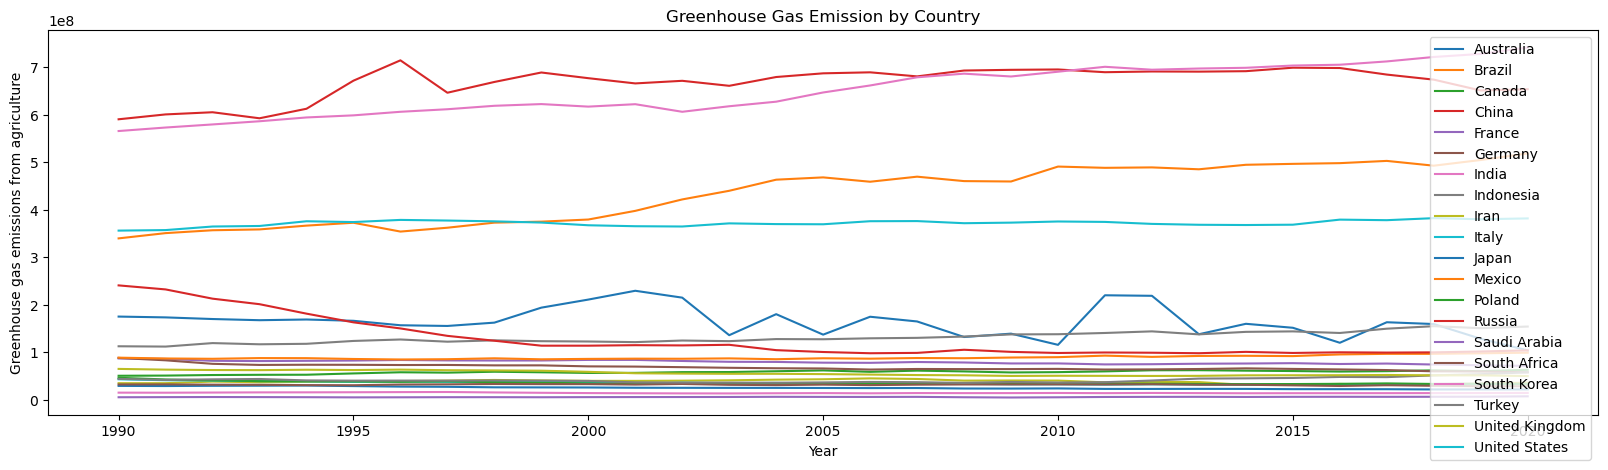

In [98]:
# Plot greenhouse gas emissions from agriculture for different years and countries
plt.figure(figsize=(20, 5))
for country in filtered_df['Country'].unique():
    country_info = filtered_df[filtered_df['Country'] == country]
    plt.plot(country_info['Year'], country_info['Greenhouse gas emissions from agriculture'], label=country)

plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions from agriculture')
plt.title('Greenhouse Gas Emission by Country')
plt.legend()
plt.show()